In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv('final_dataset.csv')
df.head()

,Unnamed: 0,Total Backward Packets,Total Length of Bwd Packets,Bwd Packet Length Max,Flow Packets/s,Bwd Packets/s,Packet Length Variance,PSH Flag Count,Down/Up Ratio,Subflow Bwd Packets,...,Init_Win_bytes_forward,act_data_pkt_fwd,min_seg_size_forward,Flow Duration,Flow IAT Mean,Flow IAT Max,Fwd IAT Mean,Fwd IAT Max,Idle Std,Label
0,0,10.0,68.0,20.0,0.210025,0.123544,2.770409e+06,0.0,1.0,10.0,...,229.0,5.0,20.0,80942880.0,5058930.0,73600000.0,13500000.0,80300000.0,47300000.0,BENIGN
1,1,1.0,6.0,6.0,153846.160000,76923.080000,5.333334e+00,1.0,1.0,1.0,...,1024.0,0.0,24.0,13.0,13.0,13.0,0.0,0.0,0.0,PortScan
2,2,9.0,62.0,20.0,0.211247,0.126748,3.662699e+06,0.0,1.0,9.0,...,229.0,4.0,20.0,71007070.0,5071934.0,66900000.0,14200000.0,70600000.0,0.0,BENIGN
3,3,7.0,11595.0,5792.0,67.655790,47.359055,3.327892e+06,1.0,2.0,7.0,...,29200.0,1.0,32.0,147807.0,16423.0,135274.0,6010.0,11001.0,0.0,DDoS
4,4,1.0,6.0,6.0,35087.720000,17543.860000,5.333334e+00,1.0,1.0,1.0,...,1024.0,0.0,24.0,57.0,57.0,57.0,0.0,0.0,0.0,PortScan


In [3]:
df

,Unnamed: 0,Total Backward Packets,Total Length of Bwd Packets,Bwd Packet Length Max,Flow Packets/s,Bwd Packets/s,Packet Length Variance,PSH Flag Count,Down/Up Ratio,Subflow Bwd Packets,...,Init_Win_bytes_forward,act_data_pkt_fwd,min_seg_size_forward,Flow Duration,Flow IAT Mean,Flow IAT Max,Fwd IAT Mean,Fwd IAT Max,Idle Std,Label
0,0,10.0,68.0,20.0,0.210025,0.123544,2.770409e+06,0.0,1.0,10.0,...,229.0,5.0,20.0,80942880.0,5058930.0,73600000.0,13500000.0,80300000.0,4.730000e+07,BENIGN
1,1,1.0,6.0,6.0,153846.160000,76923.080000,5.333334e+00,1.0,1.0,1.0,...,1024.0,0.0,24.0,13.0,13.0,13.0,0.0,0.0,0.000000e+00,PortScan
2,2,9.0,62.0,20.0,0.211247,0.126748,3.662699e+06,0.0,1.0,9.0,...,229.0,4.0,20.0,71007070.0,5071934.0,66900000.0,14200000.0,70600000.0,0.000000e+00,BENIGN
3,3,7.0,11595.0,5792.0,67.655790,47.359055,3.327892e+06,1.0,2.0,7.0,...,29200.0,1.0,32.0,147807.0,16423.0,135274.0,6010.0,11001.0,0.000000e+00,DDoS
4,4,1.0,6.0,6.0,35087.720000,17543.860000,5.333334e+00,1.0,1.0,1.0,...,1024.0,0.0,24.0,57.0,57.0,57.0,0.0,0.0,0.000000e+00,PortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495104,495104,1.0,6.0,6.0,46511.630000,23255.814000,1.200000e+01,1.0,1.0,1.0,...,29200.0,0.0,40.0,43.0,43.0,43.0,0.0,0.0,0.000000e+00,PortScan
495105,495105,20.0,5130.0,1418.0,0.371079,0.172595,1.453902e+05,1.0,0.0,20.0,...,29200.0,5.0,32.0,115878344.0,2759008.2,10000000.0,5267197.5,10100000.0,4.626007e+03,BENIGN
495106,495106,7.0,11595.0,4344.0,0.132676,0.071441,1.811930e+06,0.0,1.0,7.0,...,251.0,1.0,32.0,97982880.0,8165240.0,97800000.0,19600000.0,97800000.0,0.000000e+00,DDoS
495107,495107,1.0,6.0,6.0,31746.031000,15873.016000,5.333334e+00,1.0,1.0,1.0,...,1024.0,0.0,24.0,63.0,63.0,63.0,0.0,0.0,0.000000e+00,PortScan


In [4]:
df.shape

(495109, 21)

In [5]:
X = df.iloc[:, :-1]
X

,Unnamed: 0,Total Backward Packets,Total Length of Bwd Packets,Bwd Packet Length Max,Flow Packets/s,Bwd Packets/s,Packet Length Variance,PSH Flag Count,Down/Up Ratio,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,act_data_pkt_fwd,min_seg_size_forward,Flow Duration,Flow IAT Mean,Flow IAT Max,Fwd IAT Mean,Fwd IAT Max,Idle Std
0,0,10.0,68.0,20.0,0.210025,0.123544,2.770409e+06,0.0,1.0,10.0,68.0,229.0,5.0,20.0,80942880.0,5058930.0,73600000.0,13500000.0,80300000.0,4.730000e+07
1,1,1.0,6.0,6.0,153846.160000,76923.080000,5.333334e+00,1.0,1.0,1.0,6.0,1024.0,0.0,24.0,13.0,13.0,13.0,0.0,0.0,0.000000e+00
2,2,9.0,62.0,20.0,0.211247,0.126748,3.662699e+06,0.0,1.0,9.0,62.0,229.0,4.0,20.0,71007070.0,5071934.0,66900000.0,14200000.0,70600000.0,0.000000e+00
3,3,7.0,11595.0,5792.0,67.655790,47.359055,3.327892e+06,1.0,2.0,7.0,11595.0,29200.0,1.0,32.0,147807.0,16423.0,135274.0,6010.0,11001.0,0.000000e+00
4,4,1.0,6.0,6.0,35087.720000,17543.860000,5.333334e+00,1.0,1.0,1.0,6.0,1024.0,0.0,24.0,57.0,57.0,57.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495104,495104,1.0,6.0,6.0,46511.630000,23255.814000,1.200000e+01,1.0,1.0,1.0,6.0,29200.0,0.0,40.0,43.0,43.0,43.0,0.0,0.0,0.000000e+00
495105,495105,20.0,5130.0,1418.0,0.371079,0.172595,1.453902e+05,1.0,0.0,20.0,5130.0,29200.0,5.0,32.0,115878344.0,2759008.2,10000000.0,5267197.5,10100000.0,4.626007e+03
495106,495106,7.0,11595.0,4344.0,0.132676,0.071441,1.811930e+06,0.0,1.0,7.0,11595.0,251.0,1.0,32.0,97982880.0,8165240.0,97800000.0,19600000.0,97800000.0,0.000000e+00
495107,495107,1.0,6.0,6.0,31746.031000,15873.016000,5.333334e+00,1.0,1.0,1.0,6.0,1024.0,0.0,24.0,63.0,63.0,63.0,0.0,0.0,0.000000e+00


In [6]:
from sklearn.preprocessing import LabelEncoder

classList = df.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(classList)

In [7]:
dict(enumerate(convertor.classes_))

{0: 'BENIGN',
 1: 'DDoS',
 2: 'FTP-Patator',
 3: 'PortScan',
 4: 'SSH-Patator',
 5: 'Web Attack'}

In [8]:
Y

array([0, 3, 0, ..., 1, 3, 1])

In [9]:
X=np.array(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

In [12]:
print('Training Sample :')
print(f'X = {X_train.shape}, Y = {Y_train.shape}')
print("\n")
print('Training Sample :')
print(f'X = {X_test.shape}, Y = {Y_test.shape}')

Training Sample :
X = (346576, 20), Y = (346576,)


Training Sample :
X = (148533, 20), Y = (148533,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Testing Accuracy

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

0.9338261531107566


# Training Accuracy

In [17]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_test, Y_test)

Y_pred = classifier.predict(X_train)

In [18]:
print(metrics.accuracy_score(Y_train, Y_pred))

0.9301942431097364


# Heat Map

Text(69.0, 0.5, 'Actual Values')

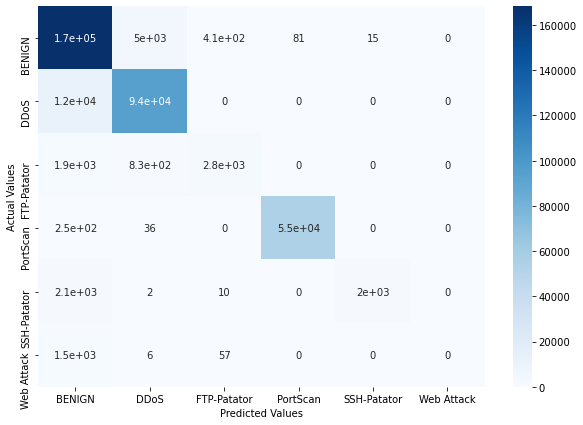

In [33]:
cm=confusion_matrix(Y_train,Y_pred)
labels = ['BENIGN', 'DDoS', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'Web Attack']
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')